In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('CC GENERAL.csv')


In [10]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [11]:
data = data.drop(columns=["CUST_ID"])

In [12]:
null_counts = data.isnull().sum()
null_counts

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
null_counts = data.isnull().sum()
null_counts

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

def plot_distribution_of_clas_in_data(data, output_label):
    try:
        if pd.api.types.is_numeric_dtype(data[output_label]):
            values = data[output_label].dropna()
            
            mean_val = values.mean()
            median_val = values.median()
            mode_val = values.mode()[0] if not values.mode().empty else None
            
            # IQR Calculation for Outliers
            Q1 = np.percentile(values, 25)
            Q3 = np.percentile(values, 75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = values[(values < lower_bound) | (values > upper_bound)]

            # Histogram
            fig = go.Figure()
            fig.add_trace(go.Histogram(
                x=values,
                nbinsx=30,
                name='Histogram',
                marker_color='lightblue',
                opacity=0.7
            ))

            # KDE Curve
            kde = gaussian_kde(values)
            x_range = np.linspace(values.min(), values.max(), 500)
            fig.add_trace(go.Scatter(
                x=x_range,
                y=kde(x_range) * len(values) * (values.max()-values.min()) / 30,
                mode='lines',
                name='KDE',
                line=dict(color='darkblue', width=2)
            ))

            # Add Mean / Median / Mode
            fig.add_vline(x=mean_val, line=dict(color="blue", dash="dot"), annotation_text=f"Mean: {mean_val:.2f}", annotation_position="top")
            fig.add_vline(x=median_val, line=dict(color="green", dash="dash"), annotation_text=f"Median: {median_val:.2f}", annotation_position="top")
            if mode_val is not None:
                fig.add_vline(x=mode_val, line=dict(color="orange", dash="solid"), annotation_text=f"Mode: {mode_val:.2f}", annotation_position="top")

            # Outlier markers
            if not outliers.empty:
                fig.add_trace(go.Scatter(
                    x=outliers,
                    y=[0]*len(outliers),
                    mode='markers',
                    marker=dict(color='red', size=8, symbol='x'),
                    name='Outliers',
                    showlegend=True
                ))

            fig.update_layout(
                title=f"Numerical Distribution of '{output_label}' with Stats & Outliers",
                xaxis_title=output_label,
                yaxis_title="Count",
                showlegend=True
            )

        else:
            # Categorical as before
            counts = data[output_label].value_counts().sort_index()
            classes = counts.index.tolist()
            values = counts.values.tolist()
            total = sum(values)
            percentages = [(v / total) * 100 for v in values]
            percentage_labels = [f"{p:.2f}%" for p in percentages]

            min_value = min(values)
            max_value = max(values)

            fig = go.Figure()
            fig.add_trace(go.Bar(
                x=classes,
                y=values,
                marker_color='royalblue',
                name='Class Count',
                text=percentage_labels,
                textposition='auto'
            ))

            fig.add_shape(
                type="line",
                x0=-0.5,
                x1=len(classes)-0.5,
                y0=min_value,
                y1=min_value,
                line=dict(color="green", dash="dash"),
            )
            fig.add_shape(
                type="line",
                x0=-0.5,
                x1=len(classes)-0.5,
                y0=max_value,
                y1=max_value,
                line=dict(color="red", dash="dash"),
            )

            fig.add_annotation(
                x=len(classes) - 1, 
                y=(min_value + max_value) / 2,
                ax=len(classes) - 1,
                ay=min_value,
                xref='x', yref='y',
                axref='x', ayref='y',
                showarrow=True,
                arrowhead=3,
                arrowsize=1,
                arrowwidth=2,
                arrowcolor="orange",
                text=f"Diff: {max_value - min_value}",
                font=dict(color="orange")
            )

            fig.update_layout(
                title=f"Class Distribution of '{output_label}' with Min/Max Lines and Percentages",
                xaxis_title="Class",
                yaxis_title="Count",
                showlegend=False
            )

        return fig

    except Exception as e:
        print(f"Error in plotting distribution: {e}")


In [17]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [24]:
for coulm in data.columns:
    a= plot_distribution_of_clas_in_data(data, coulm)
    a.show()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT_LIMI

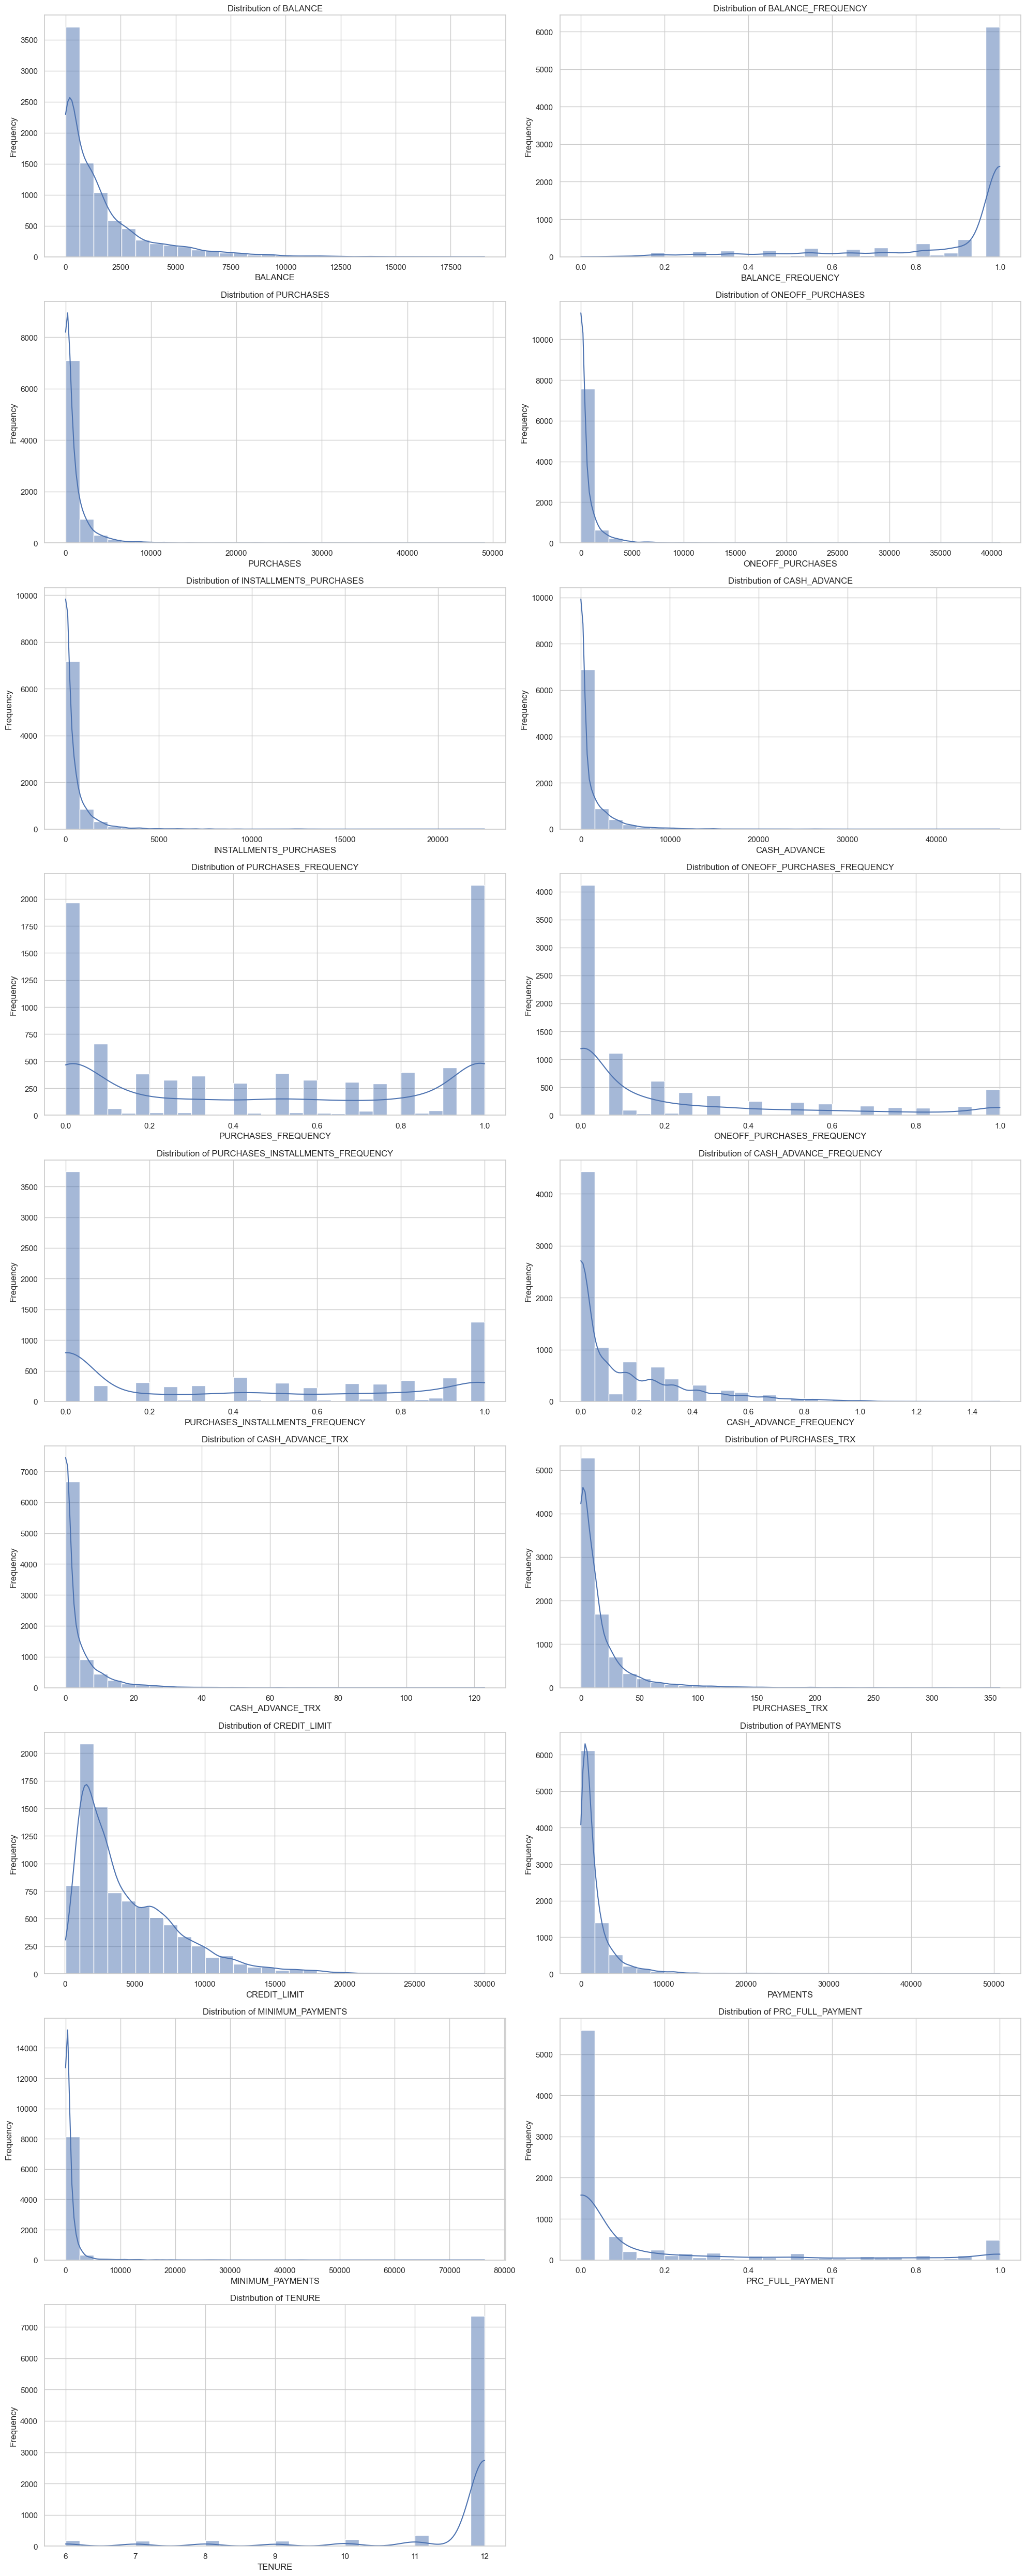

In [ ]:
numeric_df = data
sns.set(style="whitegrid")
plt.figure(figsize=(20, 50))
for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(9, 2, i)
    sns.histplot(numeric_df[column].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()